In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
from scipy.linalg import sqrtm
from numpy.linalg import inv

In [25]:
def enkf(ensemble, phi, observations, R):
    ensemble_means = np.empty(N_observations)
    M = len(ensemble)
    for i in range(N_observations):
        ensemble_mean = np.mean(ensemble)
        ensemble_variance = np.var(ensemble)
        K = ensemble_variance/(ensemble_variance + R)
        kalman_analysis_mean = ensemble_mean - K*(ensemble_mean - observations[i])
        kalman_analysis_variance = ensemble_variance*(1 - K)
        
        noise = np.sqrt(R) * np.random.randn(M)
        noise -= np.mean(noise)
        
        ensemble = ensemble - K * (ensemble - observations[i] + noise)
        
        ensemble_means[i] = np.mean(ensemble)
        ensemble = phi(ensemble) + np.random.randn(M)
#         if max(abs(ensemble)) > 1000:
#             print("Kalman, ", i)
#             print(max(abs(ensemble)))
    return ensemble_means

def esrf(ensemble, phi, observations, R):
    ensemble_means = np.empty(N_observations)
    M = len(ensemble)
    for i in range(N_observations):
        ensemble_mean = np.mean(ensemble)
        ensemble_variance = np.var(ensemble)
        ensemble_pertubations = ensemble - ensemble_mean

        S = (np.identity(M) + 1/(M-1) * 1/R * np.outer(ensemble_pertubations, ensemble_pertubations))
        psd = np.all(np.linalg.eigvals(S) > 0)
        #ensemble exploded, just return infinity for all means to get infinite rmse
        if not psd:
            return np.ones(N_observations) * np.inf
        
        S = inv(sqrtm(S))
        w = np.ones(M)/M - 1/(M-1) * 1/R * matrix_power(S, 2) @ ensemble_pertubations * (ensemble_mean - observations[i])
        
        prior_max = max(abs(ensemble))
        ensemble = w * ensemble + S.T @ ensemble_pertubations
        later_max = max(abs(ensemble))
        
        ensemble_means[i] = np.mean(ensemble)
        ensemble = phi(ensemble) + np.random.randn(M)
        
    return ensemble_means

In [26]:
Ms = [10, 30, 50, 100, 200, 500, 750, 1000]
phi_1 = lambda x:-x
phi_2 = lambda x:x
phi_3 = lambda x:x**3
phis = [phi_1, phi_2, phi_3]

N_observations = 10000
observations = np.zeros(N_observations)
R = 4

In [28]:
rmse = np.zeros((2, len(Ms), len(phis)))
for i, M in enumerate(Ms):
    print("M = %d" % M)
    for j, phi in enumerate(phis):
        print("\tPhi = %d " % j)
        initial_ensemble = np.sqrt(2) * np.random.randn(M)
        ensemble_means = enkf(initial_ensemble, phi, observations, R)
        rmse[0, i, j] = np.sqrt(np.sum(ensemble_means**2) / N_observations)
        


M = 10
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 30
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 50
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 100
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 200
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 500
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 750
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 1000
	Phi = 0 
	Phi = 1 
	Phi = 2 


In [33]:
for i, M in enumerate(Ms[:4]):
    print("M = %d" % M)
    for j, phi in enumerate(phis):
        print("\tPhi = %d " % j)
        initial_ensemble = np.sqrt(2) * np.random.randn(M)
        ensemble_means = esrf(initial_ensemble, phi, observations, R)
        rmse[1, i, j] = np.sqrt(np.sum(ensemble_means**2) / N_observations)

M = 10
	Phi = 0 


/home/jakiw/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part


	Phi = 1 
	Phi = 2 
M = 30
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 50
	Phi = 0 
	Phi = 1 
	Phi = 2 
M = 100
	Phi = 0 
	Phi = 1 
	Phi = 2 


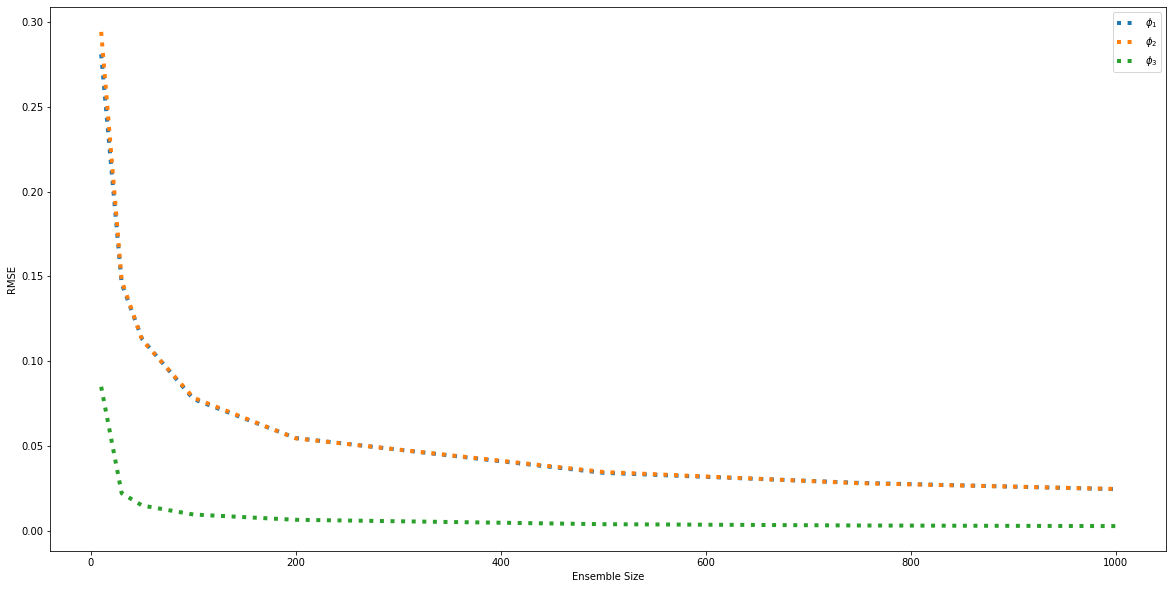

In [30]:
plt.figure(figsize=(20,10))
for i in range(0,3):
    plt.plot(Ms, rmse[0, :, i], label="$\phi_%d$" % (i+1), lw=4, linestyle=":")
    plt.xlabel("Ensemble Size")
    plt.ylabel("RMSE")
    
plt.legend()

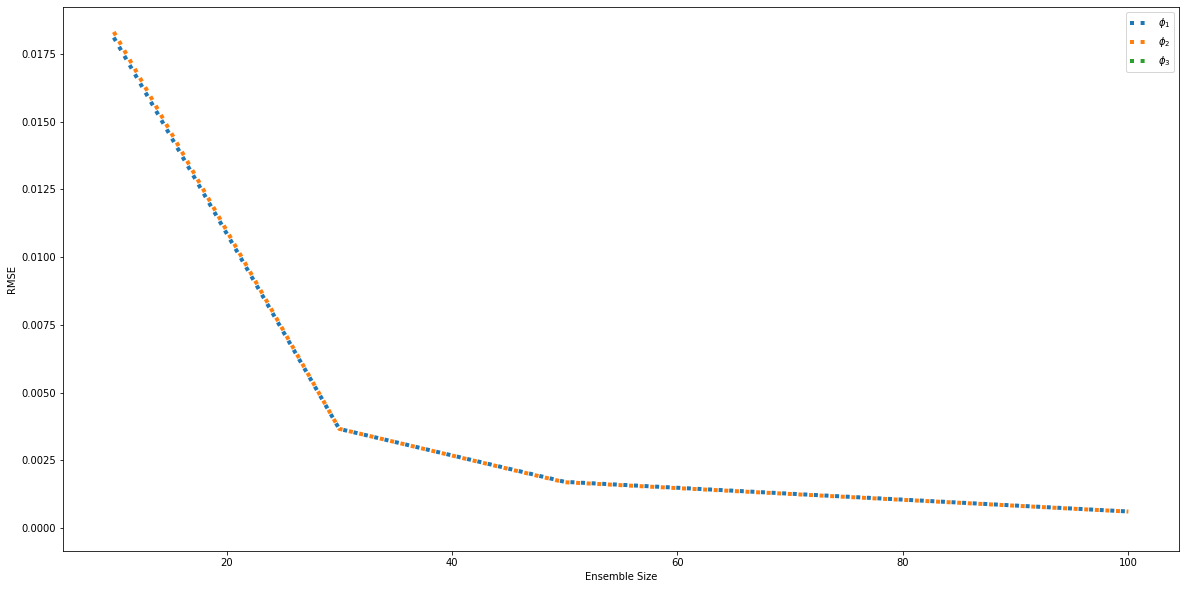

In [34]:
plt.figure(figsize=(20,10))
for i in range(0,3):
    plt.plot(Ms[:4], rmse[1, :4, i], label="$\phi_%d$" % (i+1), lw=4, linestyle=":")
    plt.xlabel("Ensemble Size")
    plt.ylabel("RMSE")
    
plt.legend()